In [258]:
from IPython.core.pylabtools import figsize
%matplotlib inline
import math
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

simulator = AerSimulator()

In [259]:
def run_with_plot(circuit, shots=1024, ax=None, should_show_close=True, figsize=None):
    counts = simulator.run(circuit, shots=shots).result().get_counts(circuit)
    if should_show_close:
        plt.close()
    plot_histogram(counts, ax=ax, figsize=figsize)
    if should_show_close:
        plt.show()
        plt.close()


def draw_bloch_sphere(state):
    plt.close()
    plot_bloch_multivector(state)
    plt.show()
    plt.close()


def bloch_coords(a, b):
    x = round(float((b.conjugate() * a + b * a.conjugate()).real), 5)
    y = round(float((1j * (b.conjugate() * a - b * a.conjugate())).real), 5)
    z = round(float((a * a.conjugate() - b * b.conjugate()).real), 5)
    return x, y, z


def cartesian_to_spherical(x, y, z):
    r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = math.degrees(math.atan2(math.sqrt(x ** 2 + y ** 2), z))
    phi = math.degrees(math.atan2(y, x) if r != 0 else 0)
    return phi, theta, r


def print_state_2qubits(state):
    qubits = ['00', '10', '01', '11']
    print("state: ", end="")
    for i in range(len(state.data) - 1):
        print(f"{qubits[i]}: {state.data[i]}", end=", ")
    print(f"{qubits[-1]}: {state.data[-1]}")


def print_state_3qubits(state):
    qubits = ['000', '100', '010', '110', '001', '101', '011', '111']
    print("state: ", end="")
    for i in range(len(state.data) - 1):
        print(f"{qubits[i]}: {state.data[i]}", end=", ")
    print(f"{qubits[-1]}: {state.data[-1]}")


def draw_circuit(circuit):
    plt.close()
    circuit.draw('mpl')
    plt.show()
    plt.close()

# –£–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ 3

### 1.
<br>–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
–¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ ‚àö1/2
(| 00‚ü©‚àí | 11‚ü©). –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

state: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
probas: [0.5 0.  0.  0.5]


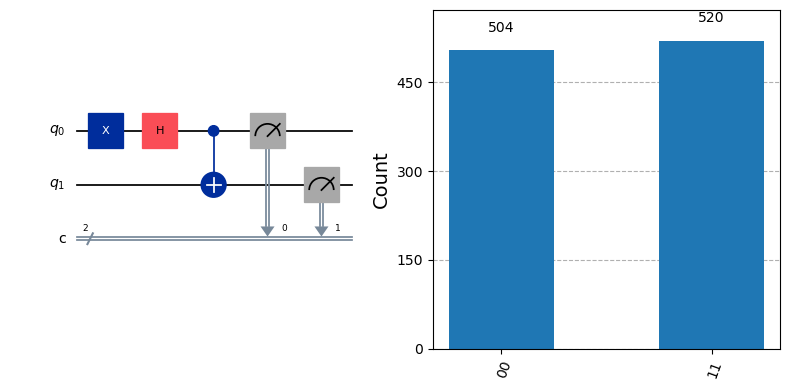

In [260]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.x(q_reg[0])
circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–î–ª—è q[0] –¥–æ $CNOT$ –ø–æ–ª—É—á–∞–µ–º $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$, q[1] —Ä–∞–≤–µ–Ω $|0\rangle$, —Ç–æ–≥–¥–∞ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏—è –¥–ª—è –¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ $\frac{1}{\sqrt{2}}\left(|00\rangle - |10\rangle\right)$. –ü—Ä–∏–º–µ–Ω–∏–º $CNOT$ –∫ —ç—Ç–æ–º—É —Å–æ—Å—Ç–æ—è–Ω–∏—é, –ø—Ä–∏—á—ë–º –∏–∑-–∑–∞ –ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –º–æ–∂–µ–º –ø—Ä–∏–º–µ–Ω—è—Ç—å –∫ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏–∏. $CNOT |00\rangle = |00\rangle$ –∏ $CNOT |10\rangle = |11\rangle$. –¢–æ–≥–¥–∞ –∏—Ç–æ–≥–æ–≤–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ $\frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$.

### 2.
<br>
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
–¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ ‚àö1/2 (| 00‚ü©+ | 11‚ü©). –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

In [261]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print("state:", state.data)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

state: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
probas: [0.5 0.  0.  0.5]


–ó–¥–µ—Å—å, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –ø—É–Ω–∫—Ç–∞, q[0] –¥–æ $CNOT$ —Ä–∞–≤–µ–Ω $\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. –î–∞–ª–µ–µ –ø—Ä–∏–º–µ–Ω—è–µ–º $CNOT$, –ø–æ–ª—É—á–∞–µ–º $\frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.

### 3.
<br>
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
–¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ ‚àö1/2
(| 01‚ü©‚àí | 10‚ü©). –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.


In [262]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[1])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

state: 00: 0j, 10: (-0.7071067811865475+0j), 01: (0.7071067811865475+0j), 11: 0j
probas: [0.  0.5 0.5 0. ]


–î–æ $CNOT$: $\frac{1}{\sqrt{2}}\left( |01\rangle + |11\rangle \right)$. –ü—Ä–∏–º–µ–Ω–∏–≤ $CNOT$: $\frac{1}{\sqrt{2}}\left( |01\rangle + |10\rangle \right)$

$
Z = 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$. –¢–æ–≥–¥–∞ –¥–ª—è $|0\rangle$: 
$
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \cdot
\begin{pmatrix}
1\\
0 
\end{pmatrix} = 
\begin{pmatrix}
1\\
0 
\end{pmatrix} = |0\rangle
$. –î–ª—è $|1\rangle$:
$
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \cdot
\begin{pmatrix}
0\\
1 
\end{pmatrix} = 
\begin{pmatrix}
0\\
-1
\end{pmatrix} = -|1\rangle
$


–í –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∞–µ–º $\frac{1}{\sqrt{2}}\left( |01\rangle - |10\rangle \right)$.

### 4.
<br>
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
–¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ ‚àö1/2
(| 01‚ü©+ | 10‚ü©). –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

state: 00: 0j, 10: (0.7071067811865475+0j), 01: (0.7071067811865475+0j), 11: 0j
probas: [0.  0.5 0.5 0. ]


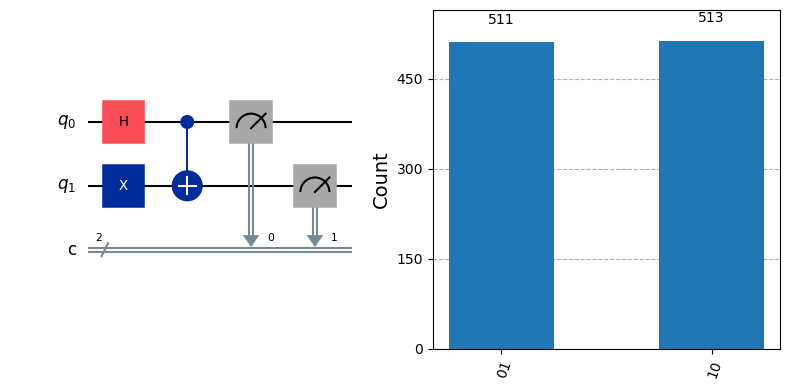

In [263]:
q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.h(q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–≠—Ç–∞ —Å—Ö–µ–º–∞ - –ø—Ä–µ–¥—ã–¥—É—â–∞—è –±–µ–∑ $Z$. –î–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è $Z$ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –∫–∞–∫ —Ä–∞–∑ –±—ã–ª–æ —Ä–∞–≤–Ω–æ $\frac{1}{\sqrt{2}}\left( |01\rangle + |10\rangle \right)$.

### 5. –í–∞—Ä–∏–∞–Ω—Ç 14
<br>
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
–¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—Ä–∏–∞–Ω—Ç–∞–º–∏ –∑–∞–¥–∞–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–º–∏ –≤ —Ç–∞–±–ª–∏—Ü–µ 2.
–í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ
—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

![](images/lab2/table_cell.png)

state: 00: 0j, 10: (-0.8062257748298549+0j), 01: (0.5916079783099616+0j), 11: 0j
probas: [0.   0.65 0.35 0.  ]


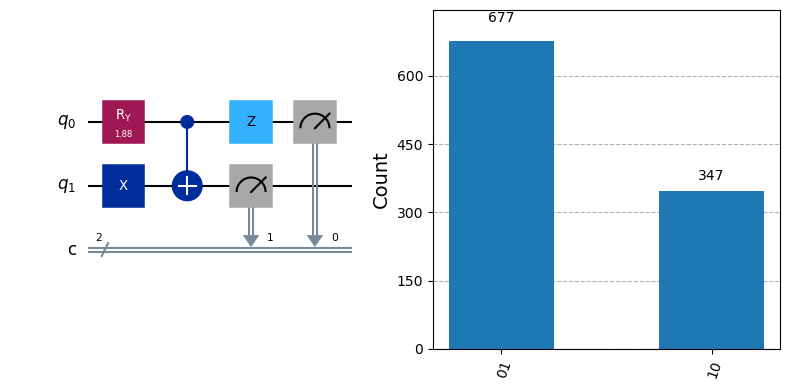

In [264]:
a_prob = 0.35
a = math.sqrt(a_prob)
theta = 2 * math.acos(a)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(theta, q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[1])
circuit.z(q_reg[0])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–ß—Ç–æ–±—ã –∑–∞–¥–∞—Ç—å $a$ –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π $b$, –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è $Ry(\theta)$, –∫–æ—Ç–æ—Ä—ã–π –∏–∑ $|0\rangle$ –ø–æ–ª—É—á–∏—Ç $\cos \left( \frac{\theta}{2} \right)|0\rangle + \sin \left( \frac{\theta}{2} \right)|1\rangle$. –ï—Å–ª–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π $\theta < \pi => 0.5 \theta < 0.5 \pi$, —Ç–æ cos –∏ sin - –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ. –ó–Ω–∞—á–∏—Ç $\theta$ –º–æ–∂–Ω–æ –≤–∑—è—Ç—å –∫–∞–∫ $\arccos(\sqrt{|a|^2})$. –î–∞–ª–µ–µ, –ø–æ–ª—É—á–∏–≤ –Ω—É–∂–Ω—ã–µ $a$ –∏ $b$, –¥–µ–π—Å—Ç–≤—É–µ–º –∫–∞–∫ –≤ –ø. 3, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –Ω—É–∂–Ω—É—é –ø–∞—Ä—É —Å–æ—Å—Ç–æ—è–Ω–∏–π $a|01\rangle +b|10\rangle$ –∏ –º–∏–Ω—É—Å –ø–µ—Ä–µ–¥ $b|10\rangle$.

### 6.
<br>
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
—Ç—Ä–µ—Ö –∫—É–±–∏—Ç–æ–≤ a|010> + b|111> –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—Ä–∏–∞–Ω—Ç–∞–º–∏ –∑–∞–¥–∞–Ω–∏–π, –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–º–∏ –≤ —Ç–∞–±–ª–∏—Ü–µ 2. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

state: 000: 0j, 100: 0j, 010: (0.5916079783099616+0j), 110: 0j, 001: 0j, 101: 0j, 011: 0j, 111: (0.8062257748298549+0j)
probas: [0.   0.   0.35 0.   0.   0.   0.   0.65]


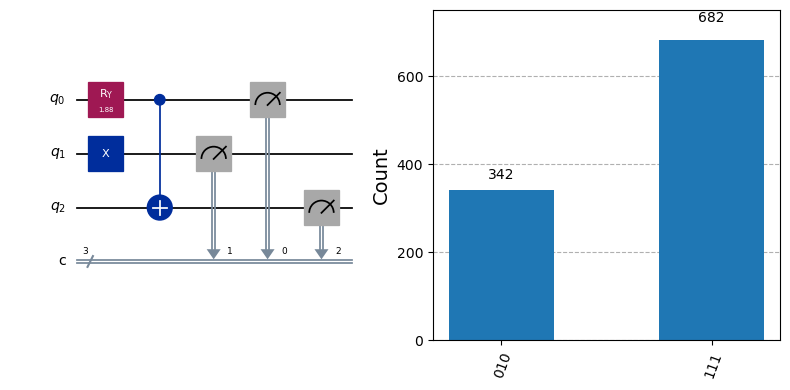

In [265]:
a_prob = 0.35
a = math.sqrt(a_prob)
theta = 2 * math.acos(a)

q_reg = QuantumRegister(3, 'q')
c_reg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(theta, q_reg[0])
circuit.x(q_reg[1])
circuit.cx(q_reg[0], q_reg[2])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
circuit.measure(q_reg[2], c_reg[2])
print_state_3qubits(state)
print("probas:", state.probabilities())

_, axs = plt.subplots(1, 2, figsize=figsize(8, 4))

circuit.draw(ax=axs[0], output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False, ax=axs[1])

plt.tight_layout()
plt.show()

–û–ø—è—Ç—å –∏—Å–ø–æ–ª—å–∑—É–µ–º $Ry$, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å $a$ –∏ $b$. q[1] —Ä–∞–≤–µ–Ω $|1\rangle$ –≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö, —Ç–∞–∫ —á—Ç–æ –µ–≥–æ –ø—Ä–æ—Å—Ç–æ –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º. –î–ª—è –∑–∞–¥–∞–Ω–∏—è q[2] –∏—Å–ø–æ–ª—å–∑—É–µ–º $CNOT$, —Ç–æ–≥–¥–∞ –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–µ –±—É–¥–µ—Ç —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å q[0].

### 7.
<br>
–°–æ–±–µ—Ä–∏—Ç–µ —Å—Ö–µ–º—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∑–∞–ø—É—Ç–∞–Ω–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞–Ω—Ç–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –∏–∑
–¥–≤—É—Ö –∫—É–±–∏—Ç–æ–≤ ùõº|00 > +ùõΩ|01 > +ùõæ|11 >, –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—Ä–∏–∞–Ω—Ç–∞–º–∏ –∑–∞–¥–∞–Ω–∏–π,
–ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã–º–∏ –≤ —Ç–∞–±–ª–∏—Ü–µ 3. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é —Ä–∞–±–æ—Ç—ã —Å—Ö–µ–º—ã. –ü–æ–ª—É—á–∏—Ç–µ
–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.


![](images/lab2/table_cell2.png)

–û–ø—Ä–µ–¥–µ–ª–∏–º –æ–ø–µ—Ä–∞—Ü–∏—é $CRy(\lambda)$ (Controlled $Ry$) (–≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ø–µ—Ä–≤—ã–π –∫—É–±–∏—Ç a - –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—â–∏–π):


![](images/lab2/cry.png)

–ï—Å–ª–∏ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—â–∏–π –∫—É–±–∏—Ç —Ä–∞–≤–µ–Ω $|0\rangle$, –∫—É–±–∏—Ç-—Ü–µ–ª—å –ø–æ–≤–æ—Ä–∞—á–∏–≤–∞–µ—Ç—Å—è –≤–æ–∫—Ä—É–≥ $Oy$ –Ω–∞ $0.5\lambda$, –∑–∞—Ç–µ–º –Ω–∞ $0.5\lambda$ –æ–±—Ä–∞—Ç–Ω–æ, —Ç–æ –µ—Å—Ç—å –æ—Å—Ç–∞—ë—Ç—Å—è —Ç–∞–∫–∏–º, –∫–∞–∫–∏–º –±—ã–ª. –ò–Ω–∞—á–µ –æ–Ω –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç—Å—è –¥–æ –≤—Ç–æ—Ä–æ–≥–æ –ø–æ–≤–æ—Ä–æ—Ç–∞, –ø–æ–≤–æ—Ä–∞—á–∏–≤–∞–µ—Ç—Å—è –∏–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–º, –∑–∞—Ç–µ–º —Å–Ω–æ–≤–∞ –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç—Å—è. –≠—Ç–æ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–æ –ø–æ–≤–æ—Ä–æ—Ç—É –Ω–∞ $\lambda$. –í –∏—Ç–æ–≥–µ, –ø–æ–≤–æ—Ä–æ—Ç –Ω–∞ $\lambda$ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç, –µ—Å–ª–∏ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—â–∏–π –∫—É–±–∏—Ç –Ω–µ–Ω—É–ª–µ–≤–æ–π, –∏–Ω–∞—á–µ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç.

state: 00: (0.5000000000000001+0j), 10: 0j, 01: (0.5000000000000001+0j), 11: (0.7071067811865476+0j)
probas: [0.25 0.   0.25 0.5 ]


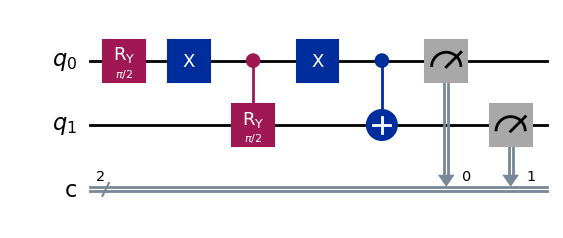

In [266]:
alpha_prob = 0.25
gamma_prob = 0.5
not_gamma_prob = 1 - gamma_prob
alpha = math.sqrt(alpha_prob)
g_theta = 2 * math.acos(math.sqrt(not_gamma_prob))
sub_alpha_prob = alpha_prob / not_gamma_prob
sub_alpha = math.sqrt(sub_alpha_prob)
a_theta = 2 * math.acos(sub_alpha)

q_reg = QuantumRegister(2, 'q')
c_reg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
plt.close()
circuit.ry(g_theta, q_reg[0])
circuit.x(q_reg[0])
circuit.cry(a_theta, q_reg[0], q_reg[1])
circuit.x(q_reg[0])
circuit.cx(q_reg[0], q_reg[1])
state = Statevector.from_instruction(circuit)
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
print_state_2qubits(state)
print("probas:", state.probabilities())

circuit.draw(output='mpl')
run_with_plot(circuit, figsize=(5, 5), should_show_close=False)

plt.show()

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ q[1] –∏–¥—ë—Ç –ø–µ—Ä–≤—ã–º, q[0] –≤—Ç–æ—Ä—ã–º. –°–Ω–∞—á–∞–ª–∞ q[0] –ø–æ–≤–æ—Ä–∞—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ $2 \arccos\left( \sqrt{1 - |\gamma|^2} \right)$, —á—Ç–æ–±—ã –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å $|0\rangle$ –±—ã–ª–∞ —Ä–∞–≤–Ω–∞ $1 - |\gamma|^2$, –∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å $|1\rangle$ —Ä–∞–≤–Ω–∞ $|\gamma|^2$. –ó–∞—Ç–µ–º –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º q[0], —á—Ç–æ–±—ã $CRy$ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª, –µ—Å–ª–∏ –æ–Ω –ø–æ—Å–ª–µ –ø–æ–≤–æ—Ä–æ—Ç–∞ —Ä–∞–≤–µ–Ω $|0\rangle$. –£–≥–æ–ª –ø–æ–≤–æ—Ä–æ—Ç–∞ –¥–ª—è q[1] —Ä–∞–≤–µ–Ω $2 \arccos(\sqrt{\frac{|\alpha|^2}{1 - |\gamma|^2}})$ (–ø–æ–¥ –∫–æ—Ä–Ω–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–ª—è q[1] –±—ã—Ç—å –Ω—É–ª–µ–≤—ã–º –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ q[0] = 0). –ó–∞—Ç–µ–º q[0] —Å–Ω–æ–≤–∞ –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç—Å—è, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Å–ª–µ –ø–æ–≤–æ—Ä–æ—Ç–∞, –∞ –Ω–∞ q[1] –¥–µ–π—Å—Ç–≤—É–µ—Ç $CNOT$ –ø–æ–¥ –∫–æ–Ω—Ç—Ä–æ–ª–µ–º q[0] (—Ç–∞–∫ –∫–∞–∫ –¥–ª—è q[0]$ = |1\rangle$ –Ω—É–∂–µ–Ω q[1]$ = |1\rangle$, –æ–Ω –ø–æ–¥–µ–π—Å—Ç–≤—É–µ—Ç —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –ø–æ–≤–æ—Ä–æ—Ç–∞ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª–æ).

# –£–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ 4. –í–∞—Ä–∏–∞–Ω—Ç 14

### 14.
<br>
–†–µ–∞–ª–∏–∑—É–π—Ç–µ –∞–ª–≥–æ—Ä–∏—Ç–º —É–º–Ω–æ–∂–µ–Ω–∏—è –Ω–∞ 5. –í—ã–ø–æ–ª–Ω–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é. –ü–æ–ª—É—á–∏—Ç–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.

–ï—Å–ª–∏ —á–∏—Å–ª–æ $m$ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–æ —Å–æ—Å—Ç–æ—è–Ω–∏–µ–º $|m\rangle = |q_0q_1...q_{n-1}\rangle$, –∫ –Ω–µ–º—É –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ QFT, –∫–æ—Ç–æ—Ä–æ–µ –ø–µ—Ä–µ–≤–µ–¥—ë—Ç –µ–≥–æ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–µ, –≥–¥–µ –≤–µ–∫—Ç–æ—Ä —Å–æ—Å—Ç–æ—è–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –∫—É–±–∏—Ç–∞ –ª–µ–∂–∏—Ç –≤ $Oxy$, –∞ –µ–≥–æ —Ñ–∞–∑–∞ –≤—ã—Ä–∞–∂–∞–µ—Ç—Å—è –∫–∞–∫ $\phi_i = \frac{2m \pi}{2^{i+1}}$, –≥–¥–µ $i$ - –Ω–æ–º–µ—Ä –∫—É–±–∏—Ç–∞.

<div>
<img src="images/lab2/qft.png" width="1000"/>
</div>

–¢–æ–≥–¥–∞ –ø—Ä–∏–±–∞–≤–∏—Ç—å –∫ $m$ —á–∏—Å–ª–æ $k$ –≤ –§—É—Ä—å–µ –±–∞–∑–∏—Å–µ - –∑–Ω–∞—á–∏—Ç –ø–æ–≤–µ—Ä–Ω—É—Ç—å $q_i$ –Ω–∞ $\frac{2k \pi}{2^{i+1}}$ –≤–æ–∫—Ä—É–≥ $Oz$ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–∏—Ç–∞ $q_i$ —á–∏—Å–ª–∞ $m$ (–ø–æ—Å–ª–µ QFT).
<br>
–£–º–Ω–æ–∂–µ–Ω–∏–µ –¥–≤—É—Ö —á–∏—Å–µ–ª $m$ –∏ $k$ –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ $m \cdot k = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} m_i k_j \left( 2 ^{n - i - 1} \cdot 2^{n - j - 1} \right)
$, –µ—Å–ª–∏ –∫–∞–∂–¥–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ $n$ –±–∏—Ç–∞–º–∏. 
<br>
$m \cdot k = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} m_i k_j \left( 2 ^{2n - i -  j - 2} \right)$


–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–≥–∏—Å—Ç—Ä—ã $m$ –∏ $k$ –¥–ª–∏–Ω–æ–π $n$ –∫–∞–∂–¥—ã–π –¥–ª—è –æ–ø–µ—Ä–∞–Ω–¥–æ–≤, —Ä–µ–≥–∏—Å—Ç—Ä $out$ –¥–ª–∏–Ω–æ–π $2n$ - –¥–ª—è –æ—Ç–≤–µ—Ç–∞. –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ –æ—Ç–≤–µ—Ç –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ $|0...0\rangle$, $m$ –∏ $k$ –∫–∞–∫-—Ç–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã (–∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º–∏ —Å–æ—Å—Ç–æ—è–Ω–∏—è–º–∏, –∞ –Ω–µ —Å—É–ø–µ—Ä–ø–æ–∑–∏—Ü–∏—è–º–∏). –ü—Ä–∏–º–µ–Ω–∏–º –∫ –æ—Ç–≤–µ—Ç—É QFT. –ó–∞—Ç–µ–º –Ω—É–∂–Ω–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫—É–±–∏—Ç–∞ –æ—Ç–≤–µ—Ç–∞ $out_t$ –∏ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—â–µ–π –ø–∞—Ä—ã –∫—É–±–∏—Ç–æ–≤ $m_i$ –∏ $k_j$ –ø–æ–≤–æ—Ä–∞—á–∏–≤–∞—Ç—å $out_t$ –Ω–∞ $\displaystyle\frac{2\pi \cdot 2^{2n - i -  j - 2}}{2^{t+1}}$, –µ—Å–ª–∏ $m_i$ –∏ $k_j$ —Ä–∞–≤–Ω—ã $|1\rangle$ –∫–∞–∂–¥—ã–π. –≠—Ç–æ –≥–µ–π—Ç $\displaystyle P\left(\frac{2\pi \cdot 2^{2n - i -  j - 2}}{2^{t+1}}\right)$ (—Å –∫–æ–Ω—Ç—Ä–æ–ª–µ–º –æ—Ç $m_i$ –∏ $k_j$). –ó–∞—Ç–µ–º –ø—Ä–∏–º–µ–Ω—è–µ–º inverse QFT, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏ –∏–∑–º–µ—Ä–∏—Ç—å –µ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏–µ.

010100


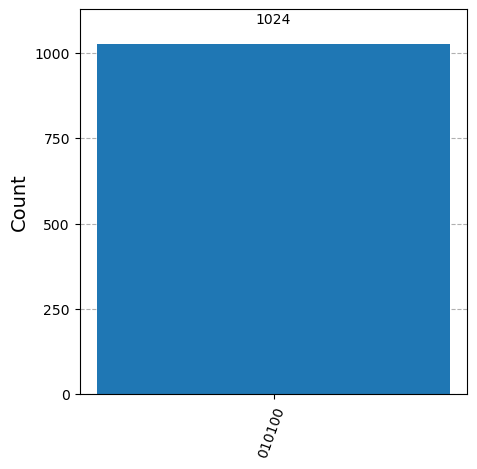

In [267]:
from qiskit.circuit.library import QFT
from qiskit import transpile
from qiskit.circuit.library.standard_gates import PhaseGate

num_state_qubits = 3
num_result_qubits = 2 * num_state_qubits
q_m = QuantumRegister(num_state_qubits, name="m")
q_k = QuantumRegister(num_state_qubits, name="k")
qr_out = QuantumRegister(num_result_qubits, name="out")

# build multiplication circuit
circuit = QuantumCircuit(q_m, q_k, qr_out)

circuit.x(q_m[0])

circuit.x(q_k[0])
circuit.x(q_k[2])

circuit.append(QFT(num_result_qubits, do_swaps=False).to_gate(), qr_out[:])

for j in range(1, num_state_qubits + 1):
    for i in range(1, num_state_qubits + 1):
        for t in range(1, num_result_qubits + 1):
            phase_change = (2 * np.pi) / (2 ** (i + j + t - 2 * num_state_qubits))
            circuit.append(PhaseGate(phase_change).control(2),
                           [q_m[j - 1], q_k[i - 1], qr_out[t - 1]])

circuit.append(QFT(num_result_qubits, do_swaps=False).inverse().to_gate(), qr_out[:])
c = ClassicalRegister(qr_out.size, name="c")
circuit.add_register(c)
for i in range(qr_out.size):
    circuit.measure(qr_out[i], c[i])
circuit.draw(output='mpl')

qc = transpile(circuit, simulator)
counts = simulator.run(qc).result().get_counts(qc)
max_state = max(counts, key=counts.get)
print(max_state)
plot_histogram(counts, figsize=(5, 5))
plt.show()


–£–º–Ω–æ–∂–∞–ª–æ—Å—å 4 –Ω–∞ 5, –ø–æ–ª—É—á–∏–ª–∏ $010100_2 = 20_{10}$. –ê–ª–≥–æ—Ä–∏—Ç–º –æ—Ç—Ä–∞–±–æ—Ç–∞–ª –ø—Ä–∞–≤–∏–ª—å–Ω–æ.